In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
bank_df_filtered = pd.read_csv('test_data.csv')

In [14]:
from sklearn.model_selection import train_test_split
X = bank_df_filtered[['age', 'job', 'marital', 'education','balance', 'housing', 'contact', 'day', 'duration','campaign', 'pdays', 'previous', 'y']]
y = bank_df_filtered['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [15]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
#kmeans.fit(df.drop('Private',axis=1))
kmeans.cluster_centers_

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([[4.09814684e+01, 3.54210650e+00, 1.11893033e+00, 2.12338729e+00,
        9.03401595e+02, 5.75181797e-01, 3.43091719e+00, 1.59071077e+01,
        2.65719681e+02, 2.79662210e+00, 3.94970678e+01, 5.34834624e-01,
        1.15880835e-01],
       [4.36272727e+01, 3.23636364e+00, 1.09090909e+00, 2.03181818e+00,
        1.14707727e+04, 4.81818182e-01, 3.05909091e+00, 1.60863636e+01,
        2.38013636e+02, 2.77727273e+00, 4.56000000e+01, 7.00000000e-01,
        9.09090909e-02]])

In [16]:
print(kmeans.labels_)#shows which datapoint has clustered with which centroid

[0 0 0 ... 0 0 0]


In [18]:
#bank_df_filtered['Cluster']

In [19]:
def converter(cluster):
    if cluster=='Yes':
        return 1
    else:   
        return 0

In [20]:
bank_df_filtered['Cluster'] = bank_df_filtered['y'].apply(converter)

In [21]:
bank_df_filtered.head()

,Unnamed: 0.1,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,...,day,month,duration,campaign,pdays,previous,poutcome,y,age_category,Cluster
0,0,0,30,8,1,3,0,1787,0,0,...,19,10.0,79,1,-1,0,9,0,2,0
1,1,1,33,6,1,2,0,4789,1,1,...,11,5.0,220,1,339,4,1,0,2,0
2,2,2,35,1,1,1,0,1350,1,0,...,16,4.0,185,1,330,1,1,0,2,0
3,3,3,30,1,1,1,0,1476,1,1,...,3,6.0,199,4,-1,0,9,0,2,0
4,4,4,59,3,1,2,0,0,1,0,...,5,5.0,226,1,-1,0,9,0,2,0


In [22]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(bank_df_filtered['Cluster'],kmeans.labels_))
print(classification_report(bank_df_filtered['Cluster'],kmeans.labels_))

[[4263  220]
 [   0    0]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.97      4483
           1       0.00      0.00      0.00         0

    accuracy                           0.95      4483
   macro avg       0.50      0.48      0.49      4483
weighted avg       1.00      0.95      0.97      4483



c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Predictions for yes :  220
Predictions for no :  4263


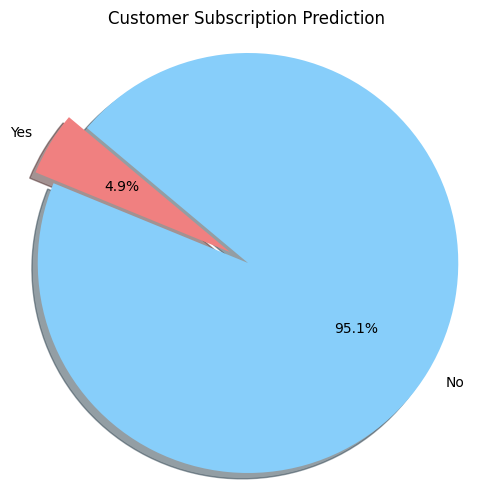

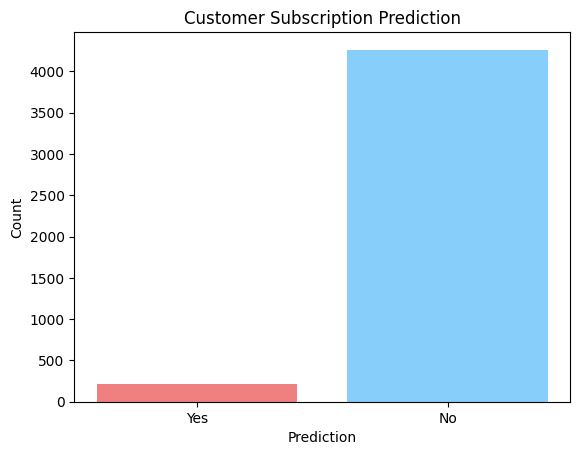

In [23]:
num_yes = sum(kmeans.labels_)  # Counting the number of 'yes' predictions
num_no = len(kmeans.labels_) - num_yes  # Counting the number of 'no' predictions
print('Predictions for yes : ',num_yes)
print('Predictions for no : ',num_no)

labels = ['Yes', 'No']
sizes = [num_yes, num_no]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # To explode the 'Yes' slice

# Creating the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Customer Subscription Prediction")
plt.show()
# Using Bar Chart:

# python
# Copy code
import matplotlib.pyplot as plt

# Assuming you have made predictions and stored them in the variable 'predictions'
num_yes = sum(kmeans.labels_)  # Counting the number of 'yes' predictions
num_no = len(kmeans.labels_) - num_yes  # Counting the number of 'no' predictions

# Data for the bar chart
labels = ['Yes', 'No']
counts = [num_yes, num_no]

# Creating the bar chart
plt.bar(labels, counts, color=['lightcoral', 'lightskyblue'])
plt.xlabel('Prediction')
plt.ylabel('Count')
plt.title('Customer Subscription Prediction')
plt.show()

In [32]:
#final_dataset = pd.read_csv('final_dataset.csv')
final_dataset = pd.read_csv('oversampled_train.csv')
X = final_dataset[['age', 'job', 'marital', 'education', 'balance', 'housing', 'contact', 'day', 'duration','campaign', 'pdays', 'previous', 'y']]
y = final_dataset['y']


In [33]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
#kmeans.fit(df.drop('Private',axis=1))
kmeans.cluster_centers_

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([[4.07015026e+01, 3.45114185e+00, 1.07294632e+00, 1.95951546e+00,
        1.02914256e+03, 3.94068975e-01, 2.68488780e+00, 1.52903687e+01,
        3.79386536e+02, 2.35518634e+00, 5.15942676e+01, 7.50009929e-01,
        4.96207056e-01],
       [4.42336227e+01, 3.07366483e+00, 1.05288082e+00, 1.85319653e+00,
        1.16609442e+04, 2.73875296e-01, 2.17890029e+00, 1.54219942e+01,
        3.84874507e+02, 2.19547488e+00, 5.27405946e+01, 8.14785583e-01,
        5.75374901e-01]])

In [34]:
from sklearn.metrics import confusion_matrix,classification_report
final_dataset['Cluster'] = final_dataset['y'].apply(converter)
print(confusion_matrix(final_dataset['Cluster'],kmeans.labels_))
print(classification_report(final_dataset['Cluster'],kmeans.labels_))

[[75534  3802]
 [    0     0]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.98     79336
           1       0.00      0.00      0.00         0

    accuracy                           0.95     79336
   macro avg       0.50      0.48      0.49     79336
weighted avg       1.00      0.95      0.98     79336



c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Predictions for yes :  3802
Predictions for no :  75534


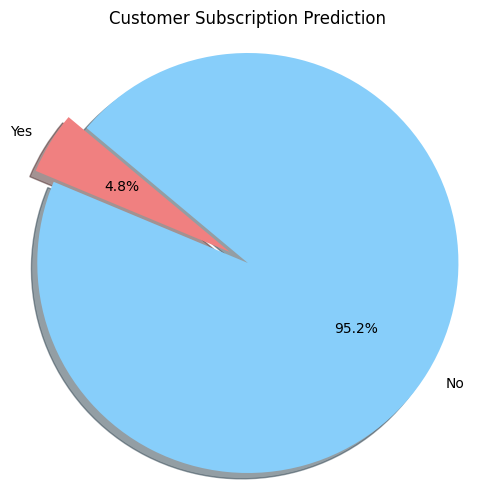

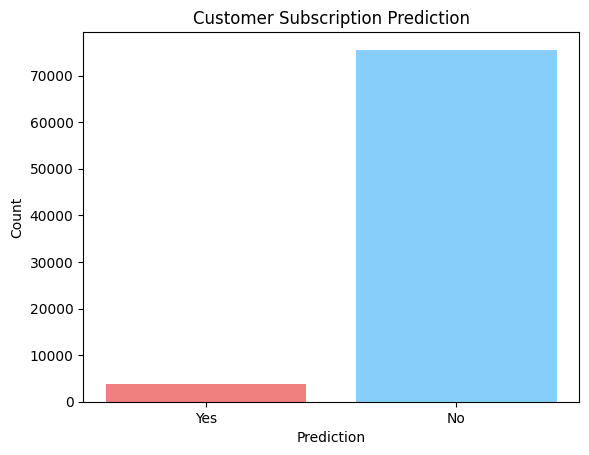

In [35]:
num_yes = sum(kmeans.labels_)  # Counting the number of 'yes' predictions
num_no = len(kmeans.labels_) - num_yes  # Counting the number of 'no' predictions
print('Predictions for yes : ',num_yes)
print('Predictions for no : ',num_no)

labels = ['Yes', 'No']
sizes = [num_yes, num_no]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # To explode the 'Yes' slice

# Creating the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Customer Subscription Prediction")
plt.show()
# Using Bar Chart:

# python
# Copy code
import matplotlib.pyplot as plt

# Assuming you have made predictions and stored them in the variable 'predictions'
num_yes = sum(kmeans.labels_)  # Counting the number of 'yes' predictions
num_no = len(kmeans.labels_) - num_yes  # Counting the number of 'no' predictions

# Data for the bar chart
labels = ['Yes', 'No']
counts = [num_yes, num_no]

# Creating the bar chart
plt.bar(labels, counts, color=['lightcoral', 'lightskyblue'])
plt.xlabel('Prediction')
plt.ylabel('Count')
plt.title('Customer Subscription Prediction')
plt.show()